In [86]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
#storing the dataset in Dataframe df
df=pd.read_csv("Attrition_dataset.csv")

**Understanding the Data**

In [88]:
#getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

**Clean the Data**
> Duplicates   
> Missing data  
> Invalid Data-Types  

In [89]:
#since employee_id is primary key so we are checking duplicates in that
df['EmployeeID'].duplicated().any()

# we have duplicates ---> True

np.True_

In [90]:
#Drooping the duplicates which are present in employeeId column and kepping the latest 
df['EmployeeID']=df['EmployeeID'].drop_duplicates(keep='last')
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,NaN,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,NaN,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,NaN,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,NaN,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,NaN,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258.0,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264.0,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279.0,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296.0,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [91]:
#removing the null values ---> NaN
df=df.dropna(axis=0)
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318.0,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
19,1319.0,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
29,1320.0,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
39,1321.0,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
49,1322.0,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258.0,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264.0,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279.0,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296.0,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [92]:
#Index number has misplaced correcting it by adding new index column
df=df.reset_index(drop=True)
df
#drop= true cox to remove old index value

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318.0,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319.0,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320.0,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321.0,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322.0,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,8258.0,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
6280,8264.0,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
6281,8279.0,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
6282,8296.0,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [93]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EmployeeID           6284 non-null   float64
 1   recorddate_key       6284 non-null   object 
 2   birthdate_key        6284 non-null   object 
 3   orighiredate_key     6284 non-null   object 
 4   terminationdate_key  6284 non-null   object 
 5   age                  6284 non-null   int64  
 6   length_of_service    6284 non-null   int64  
 7   city_name            6284 non-null   object 
 8   department_name      6284 non-null   object 
 9   job_title            6284 non-null   object 
 10  store_name           6284 non-null   int64  
 11  gender_short         6284 non-null   object 
 12  gender_full          6284 non-null   object 
 13  termreason_desc      6284 non-null   object 
 14  termtype_desc        6284 non-null   object 
 15  STATUS_YEAR          6284 non-null   i

Change the date format - all the dates       
EmployeeID float--> int    

In [94]:
lst = ['recorddate_key','birthdate_key','orighiredate_key','terminationdate_key']
for col in lst:
    df[col]=pd.to_datetime(df[col])

In [95]:
df['EmployeeID']=df['EmployeeID'].astype(int)
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
6280,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
6281,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
6282,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [96]:
#Removing unwanted columns
df=df.drop(columns=['gender_short','store_name'])

**Transformation of  Data**
>Renaming the columns   
>Replacing the values   
>Creating new Columns  
>Removing the Columns  

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmployeeID           6284 non-null   int64         
 1   recorddate_key       6284 non-null   datetime64[ns]
 2   birthdate_key        6284 non-null   datetime64[ns]
 3   orighiredate_key     6284 non-null   datetime64[ns]
 4   terminationdate_key  6284 non-null   datetime64[ns]
 5   age                  6284 non-null   int64         
 6   length_of_service    6284 non-null   int64         
 7   city_name            6284 non-null   object        
 8   department_name      6284 non-null   object        
 9   job_title            6284 non-null   object        
 10  gender_full          6284 non-null   object        
 11  termreason_desc      6284 non-null   object        
 12  termtype_desc        6284 non-null   object        
 13  STATUS_YEAR          6284 non-nul

In [98]:
#Renaming the column name
df=df.rename(columns={'EmployeeID':'Eid',
                   'recorddate_key':'Record_date',
                   'birthdate_key':'DOB',
                   'orighiredate_key':'Hiredate',
                   'terminationdate_key':'Term_date',
                   'age':'Age',
                   'length_of_service':'Experience',
                   'city_name':'City',
                   'department_name':'Department',
                   'job_title':'Job',
                   'gender_full':'Gender',
                   'termreason_desc':'Term_reason',
                   'termtype_desc':'Term_type',
                   'STATUS_YEAR':'Status_year',
                   'STATUS':'Status',
                   'BUSINESS_UNIT':'Business_Unit'
                   })

In [99]:
for col in ['Status','Business_Unit']:
    df[col]=df[col].str.title()

In [100]:
df.loc[df['Status']=='Active','Term_date']=df.loc[(df['Status']=='Active'),'Record_date']

# Level 1

1. how many employees data is present

In [101]:
df.shape[0]

6284

2. how many employees left the job

In [102]:
df.loc[df['Status']=='Terminated']['Status'].value_counts()

Status
Terminated    1485
Name: count, dtype: int64

3. how many employees are currently working

In [103]:
df.loc[df['Status']=='Active','Status'].count()

np.int64(4799)

4. how many empployees are working as CEO

In [104]:
df.loc[df['Job']=='CEO','Eid'].count()

np.int64(1)

5. how many employees are having more than 10 years of experience

In [105]:
df.loc[df['Experience']>10, 'Eid'].count()

np.int64(3825)

6. on which year employee records got updated

In [106]:
df['Status_year'].unique()

array([2015, 2009, 2014, 2012, 2007, 2010, 2011, 2006, 2008, 2013])

7. gender wise no_of_emp

In [107]:
df['Gender'].value_counts()

Gender
Female    3278
Male      3006
Name: count, dtype: int64

8. gender wise no_of active employees

In [108]:
df.loc[df['Status']=='Active','Gender'].value_counts()

Gender
Male      2436
Female    2363
Name: count, dtype: int64

9. job wise highest experience

In [109]:
df.groupby('Job')['Experience'].max()

Job
Accounting Clerk                   25
Accounts Payable Clerk             24
Accounts Receiveable Clerk         24
Auditor                            24
Baker                              24
Bakery Manager                     25
Benefits Admin                     24
CEO                                26
CHief Information Officer          26
Cashier                            21
Compensation Analyst               24
Corporate Lawyer                   24
Customer Service Manager           25
Dairy Manager                      24
Dairy Person                       25
Director, Accounting               24
Director, Accounts Payable         24
Director, Accounts Receivable      24
Director, Audit                    19
Director, Compensation             19
Director, Employee Records         24
Director, HR Technology            24
Director, Investments              19
Director, Labor Relations          19
Director, Recruitment              26
Director, Training                 19
Exec Ass

10. job wise no_of_emp

In [110]:
df['Job'].value_counts()

Job
Meat Cutter                        1218
Cashier                            1158
Dairy Person                       1032
Produce Clerk                      1027
Baker                               865
Shelf Stocker                       704
Store Manager                        35
Meats Manager                        34
Produce Manager                      33
Bakery Manager                       33
Processed Foods Manager              32
Customer Service Manager             32
HRIS Analyst                          8
Recruiter                             8
Systems Analyst                       5
Labor Relations Analyst               5
Accounting Clerk                      5
Benefits Admin                        5
Accounts Receiveable Clerk            4
Trainer                               4
Auditor                               3
Investment Analyst                    3
Accounts Payable Clerk                3
Corporate Lawyer                      3
Compensation Analyst                

11. top 10 jobs in which more employees are present

In [111]:
df['Job'].value_counts().head(10)

Job
Meat Cutter        1218
Cashier            1158
Dairy Person       1032
Produce Clerk      1027
Baker               865
Shelf Stocker       704
Store Manager        35
Meats Manager        34
Produce Manager      33
Bakery Manager       33
Name: count, dtype: int64

12. top 10 jobs in which more employees are currently working


In [112]:
df.loc[df['Status']=='Active','Job'].value_counts().head(10)

Job
Cashier                     910
Meat Cutter                 864
Dairy Person                842
Baker                       774
Produce Clerk               695
Shelf Stocker               630
Customer Service Manager     18
Processed Foods Manager      16
Produce Manager              12
Bakery Manager               12
Name: count, dtype: int64

13. top 10 jobs in which more employees left the job


In [113]:
df.loc[df['Status']=='Terminated','Job'].value_counts().head(10)

Job
Meat Cutter        354
Produce Clerk      332
Cashier            248
Dairy Person       190
Baker               91
Shelf Stocker       74
Store Manager       31
Meats Manager       23
Produce Manager     21
Bakery Manager      21
Name: count, dtype: int64

14. gender wise highest experience

In [114]:
df.groupby('Gender')['Experience'].max()

Gender
Female    26
Male      26
Name: Experience, dtype: int64

15. no_of_emp in each term_type

In [115]:
df['Term_type'].value_counts()

Term_type
Not Applicable    4799
Voluntary         1270
Involuntary        215
Name: count, dtype: int64

16. no_of_emp in each term_reason

In [116]:
df['Term_reason'].value_counts()

Term_reason
Not Applicable    4799
Retirement         885
Resignaton         385
Layoff             215
Name: count, dtype: int64

17. year wise no_of hiring

In [117]:
(df['Hiredate'].dt.year).value_counts()

#Ascending order
(df['Hiredate'].dt.year).value_counts().sort_index()


Hiredate
1989     86
1990    214
1991    200
1992    248
1993    298
1994    298
1995    312
1996    273
1997    312
1998    341
1999    315
2000    305
2001    212
2002    238
2003    218
2004    214
2005    256
2006    239
2007    237
2008    246
2009    249
2010    254
2011    242
2012    259
2013    218
Name: count, dtype: int64

18. top two date on which more hiring happened

In [118]:
df['Hiredate'].value_counts().head(2)

df.groupby('Hiredate')['Hiredate'].count()

Hiredate
1989-08-28    4
1989-08-31    2
1989-09-02    1
1989-09-05    1
1989-09-08    1
             ..
2013-12-03    1
2013-12-05    2
2013-12-09    1
2013-12-10    1
2013-12-11    1
Name: Hiredate, Length: 4415, dtype: int64

# Analysis of Attrition and Retention Using Plots

**Self and natural Join are not present in Pandas**

In [119]:
hire_cnt =(df['Hiredate'].dt.year).value_counts()
term_cnt =df.loc[df['Status']=='Terminated','Term_date'].dt.year.value_counts()

term_cnt

Term_date
2014    253
2008    164
2015    162
2007    162
2009    142
2006    134
2012    130
2010    123
2011    110
2013    105
Name: count, dtype: int64

In [120]:
# MERGE
att_ret_cnt=pd.merge(hire_cnt,term_cnt,how='outer',left_index=True,right_index=True)

# att_ret_cnt.rename(columns={'count_x':'hired_cnt',
#                             'count_y':'attr_cnt'})

#or we can do with columns

att_ret_cnt.columns = ['hired_cnt', 'attr_cnt']

In [121]:
att_ret_cnt['attr_cnt']=att_ret_cnt['attr_cnt'].fillna(0)
att_ret_cnt['hired_cnt']=att_ret_cnt['hired_cnt'].fillna(0)


In [122]:
att_ret_cnt['ret_cnt']=abs(att_ret_cnt['hired_cnt'] - att_ret_cnt['attr_cnt'])
att_ret_cnt

,hired_cnt,attr_cnt,ret_cnt
1989,86.0,0.0,86.0
1990,214.0,0.0,214.0
1991,200.0,0.0,200.0
1992,248.0,0.0,248.0
1993,298.0,0.0,298.0
1994,298.0,0.0,298.0
1995,312.0,0.0,312.0
1996,273.0,0.0,273.0
1997,312.0,0.0,312.0
1998,341.0,0.0,341.0


 Q1) Identify the Top 3 Years with the Highest Attrition Rate
 - Observe the termination type- Observe the termination reason
 - Identify which job roles were affected
 - Identify which departments were affected
 - Identify which experience levels were affected


In [123]:
o=att_ret_cnt['attr_cnt'].sort_values(ascending=False).index[:3]

<Axes: xlabel='None', ylabel='attr_cnt'>

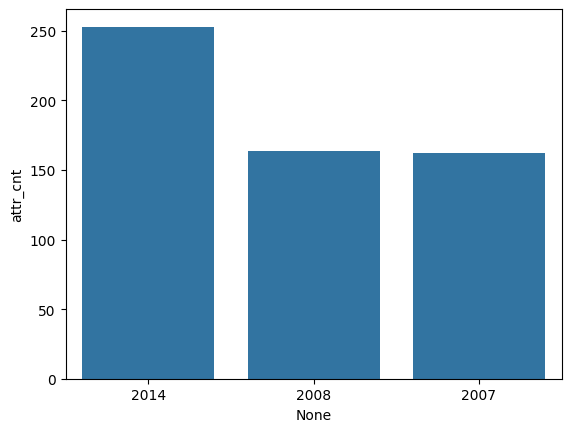

In [124]:
sns.barplot(att_ret_cnt,x=att_ret_cnt.index,y='attr_cnt',order=o)

 Q2) Identify the Top 3 Years Where Retention Was Higher Than Attrition

 Q3) Analyze the Trend of Attrition and Retention Over the Years

<Axes: xlabel='attr_cnt', ylabel='ret_cnt'>

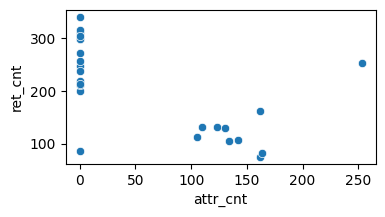

In [125]:
plt.figure(figsize=(4,2))
sns.scatterplot(att_ret_cnt,x='attr_cnt',y='ret_cnt')

Q4) Get the Count of Employees Based on Experience Levels

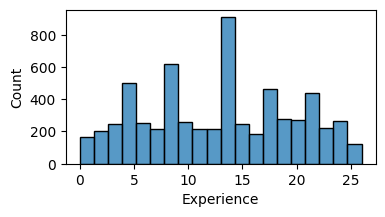

In [126]:
plt.figure(figsize=(4,2))
sns.histplot(df,x='Experience')
plt.show()


 Q5) Detect Outliers in Employee Experience Data

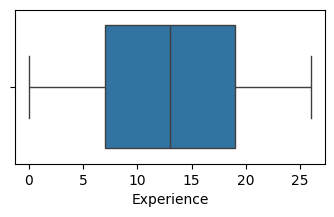

In [127]:
plt.figure(figsize=(4,2))
sns.boxplot(df,x='Experience')
plt.show()